# AI II - Assignment II

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

In [2]:
#importing the dataset

df = pd.read_csv('bank.csv', delimiter = ';')

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Question 1. 
From the modified dataset in question 2 of the previous assignment (not encoded with the features dropped) train a RandomForestClassifier (n_estimators=10). 

In [3]:
#eliminating irrelevant variables (as in the previous assignment)

df = df.drop(['poutcome','day', 'month','default', 'duration'], axis = 1)

df

,age,job,marital,education,balance,housing,loan,contact,campaign,pdays,previous,y
0,30,unemployed,married,primary,1787,no,no,cellular,1,-1,0,no
1,33,services,married,secondary,4789,yes,yes,cellular,1,339,4,no
2,35,management,single,tertiary,1350,yes,no,cellular,1,330,1,no
3,30,management,married,tertiary,1476,yes,yes,unknown,4,-1,0,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,cellular,5,-1,0,no
4517,57,self-employed,married,tertiary,-3313,yes,yes,unknown,1,-1,0,no
4518,57,technician,married,secondary,295,no,no,cellular,11,-1,0,no
4519,28,blue-collar,married,secondary,1137,no,no,cellular,4,211,3,no


In [4]:
#eliminating irrelevant variables (explanation)

# We drop the features:
# - day, month --> because they are time-specific and do not add value to our analysis
# - duration --> as it produces target-leakage 
# - poutcome, default --> as they contained many unknown variables and held a low feature importance

In [5]:
#turning the target variable into numerical

df['y'] = df['y'].map({'yes':1 ,'no':0})

In [6]:
#creating the target variable

X = df.drop(columns= 'y')
y = df.y

In [7]:
#preparing the dataset (part 1)

categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(exclude='object').columns

clt = make_column_transformer((StandardScaler(), numerical),(OrdinalEncoder(), categorical))

In [8]:
#preparing the dataset (part 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_enc_tr = clt.fit_transform(X_train)
X_enc_ts = clt.transform(X_test)

In [9]:
#training a random forest 

ens = RandomForestClassifier(n_estimators = 10)
ens.fit(X_enc_tr, y_train)

print(ens.score(X_enc_tr,y_train))
print(ens.score(X_enc_ts,y_test))

0.9828908554572271
0.8815207780725022


In [10]:
#plotting the confusion matrix

y_predicted = ens.predict(X_enc_ts)
cm_ens = confusion_matrix(y_test, y_predicted)
cm_ens

array([[989,  17],
       [117,   8]], dtype=int64)

Text(33.0, 0.5, 'Actual')

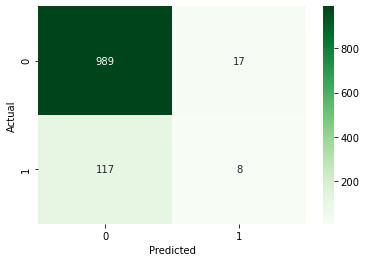

In [11]:
#visualization of the confusion matrix

plt.figure()
sns.heatmap(cm_ens, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [12]:
#plotting the confusion matrix normalized 

cm_ens_n = confusion_matrix(y_test, y_predicted, normalize='true')
cm_ens_n

array([[0.98310139, 0.01689861],
       [0.936     , 0.064     ]])

Text(33.0, 0.5, 'Actual')

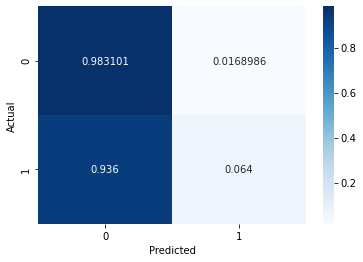

In [13]:
#visualization of the normalized confusion matrix

plt.figure()
sns.heatmap(cm_ens_n, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 1.0, 'Precision vs Recall')

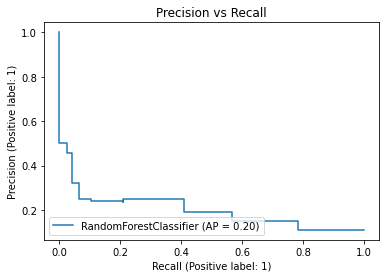

In [14]:
#plotting precision vs recall curve

plot_precision_recall_curve(ens, X_enc_ts, y_test)
plt.title('Precision vs Recall')

### Question 2. 
Apply a PCA with 4 components, how much variance from the original dataset is represented in
the new 4 components? 

In [16]:
#normalizing the dataset

sc = StandardScaler()
X_train_s = sc.fit_transform(X_enc_tr)

In [17]:
#running the PCA

pca = PCA(n_components=4, random_state=42).fit(X_train_s)
X_pca = pca.transform(X_train_s)

print(pca.explained_variance_ratio_)

[0.1590072  0.13416169 0.12653442 0.09885547]


In [18]:
#calculating total variance explained 

var_explained = pca.explained_variance_ratio_
var_explained.sum()

0.518558777286592

In [19]:
#PCA visualization (part 1)

display(pd.DataFrame(pca.components_, columns = X.columns))

,age,job,marital,education,balance,housing,loan,contact,campaign,pdays,previous
0,-0.127675,0.059769,-0.129212,0.616173,0.598317,0.063579,0.174841,0.165381,0.011023,-0.051925,-0.401246
1,0.619660,0.082524,-0.086676,0.205039,0.185651,-0.231195,-0.597385,-0.334647,-0.037423,0.038010,-0.006087
2,0.314958,0.238711,0.017844,-0.165380,-0.112106,0.422177,-0.063395,0.352708,-0.617436,-0.152295,-0.304146
3,0.027925,0.562596,-0.132583,0.026083,0.044830,0.000148,0.026854,0.106665,0.251957,-0.668751,0.373669


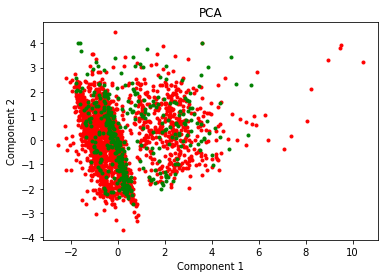

In [20]:
#PCA visualization (part 2)

def plot_data(X, y, title, xlab='Feature 1', ylab='Feature 2', n_features=2):
    colors = ['.r','.g','.b','.y','.m','.c']
    for i, c in zip(range(0, n_features), colors):
        plt.plot(X[y==i,0],X[y==i,1],c)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    
plot_data(X_pca, y_train, 'PCA', 'Component 1', 'Component 2',  n_features=4)    

### Question 3. 
Using the PCA transformation and a RandomForestClassifier (n_estimators=10), score the model (accuracy) and compute/plot the confusion matrix.

In [21]:
#running a Random Forest

ens_2 = RandomForestClassifier(n_estimators = 10)
ens_2.fit(X_pca, y_train)

RandomForestClassifier(n_estimators=10)

In [22]:
#standardizing X_test

X_test_s = sc.fit_transform(X_enc_ts)

In [23]:
#running PCA on X_test

pca = PCA(n_components=4, random_state=42).fit(X_test_s)
X_test_pca = pca.transform(X_test_s)

In [24]:
#printing model accuracy

print(ens_2.score(X_pca,y_train))
print(ens_2.score(X_test_pca, y_test))

0.9843657817109145
0.8779840848806366


In [25]:
#plotting the confusion matrix

y_predicted_2 = ens_2.predict(X_test_pca)
cm_ens_2 = confusion_matrix(y_test, y_predicted)
cm_ens_2

array([[989,  17],
       [117,   8]], dtype=int64)

Text(33.0, 0.5, 'Actual')

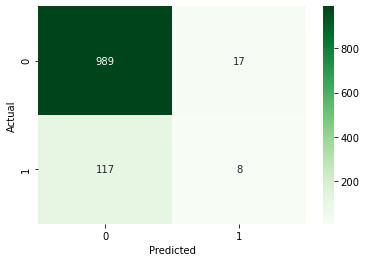

In [26]:
#visualization of the confusion matrix

plt.figure()
sns.heatmap(cm_ens_2, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [27]:
#plotting the confusion matrix normalized 

cm_ens_n2 = confusion_matrix(y_test, y_predicted, normalize='true')
cm_ens_n2

array([[0.98310139, 0.01689861],
       [0.936     , 0.064     ]])

Text(33.0, 0.5, 'Actual')

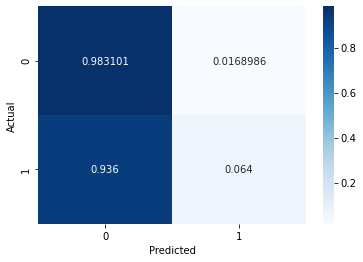

In [28]:
#visualization of the normalized confusion matrix

plt.figure()
sns.heatmap(cm_ens_n2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Question 4. 
Using GridSearchCV optimize the model to maximize 'recall', once it is optimized obtain the best parameters, a classification report of the model and the confusion matrix.

In [30]:
#optimizing recall through a random forest

ens_3 = RandomForestClassifier()

parameters = {'n_estimators':[50], 'bootstrap':['False']}
gs = GridSearchCV(ens_3, parameters, scoring='recall', n_jobs=4)
gs.fit(X_enc_tr, y_train)

print("Best estimator: {}".format(gs.best_estimator_))
print("Best parameters: {}".format(gs.best_params_))
print("Best score: {}".format(gs.best_score_))

Best estimator: RandomForestClassifier(bootstrap='False', n_estimators=50)
Best parameters: {'bootstrap': 'False', 'n_estimators': 50}
Best score: 0.06819620253164557


In [31]:
#calculating y_predicted

y_predicted_ens3 = gs.predict(X_enc_ts)

In [32]:
#classification report 1

rec = recall_score(y_test, y_predicted_ens3)
print("Recall of the SVC: {:.3f}".format(rec))

pre = precision_score(y_test, y_predicted_ens3)
print("Precision of the SVC: {:.3f}".format(pre))

report = classification_report(y_test, y_predicted_ens3)
print(report)

Recall of the SVC: 0.072
Precision of the SVC: 0.529
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1006
           1       0.53      0.07      0.13       125

    accuracy                           0.89      1131
   macro avg       0.71      0.53      0.53      1131
weighted avg       0.86      0.89      0.85      1131



In [33]:
#plotting the confusion matrix

cm_ens_3 = confusion_matrix(y_test, y_predicted_ens3)
cm_ens_3

array([[998,   8],
       [116,   9]], dtype=int64)

Text(33.0, 0.5, 'Actual')

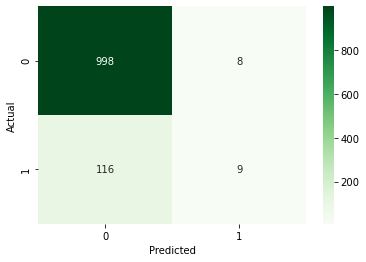

In [34]:
#visualization of the confusion matrix

plt.figure()
sns.heatmap(cm_ens_3, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [36]:
#plotting the confusion matrix normalized 

cm_ens_n3 = confusion_matrix(y_test, y_predicted, normalize='true')
cm_ens_n3

array([[0.98310139, 0.01689861],
       [0.936     , 0.064     ]])

Text(33.0, 0.5, 'Actual')

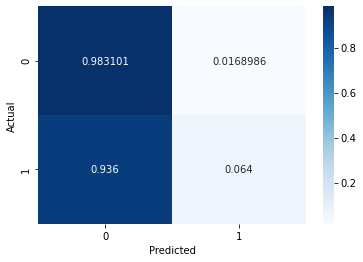

In [37]:
#visualization of the normalized confusion matrix

plt.figure()
sns.heatmap(cm_ens_n3, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Question 5. 
Using the provided code, the StratifiedKFold and GridSearchCV functions; optimize and validate the model with the recall metric.

In [38]:
#setting the pipeline

pipe = Pipeline(steps=[('pre',make_column_transformer((StandardScaler(), numerical),
(OrdinalEncoder(), categorical))),('SVM',SVC())])
parameters_rf = {'SVM__kernel':['linear','rbf'],'SVM__C':np.linspace(0.01,10,5),
'SVM__gamma':np.linspace(0.01,10,5)}

In [39]:
#running the model to optimize recall

gs = GridSearchCV(pipe, parameters_rf, scoring='recall', cv=5)
kf = StratifiedKFold(shuffle=True, n_splits=5, random_state=42)
cv = cross_validate(gs, X, y, cv=kf, n_jobs=4, return_estimator=True)

In [40]:
#printing the results (part 1)

print("Cross validation results: {}".format(cv))
print("Best recall {:.3f}".format(cv['test_score'].mean()))

Cross validation results: {'fit_time': array([1938.22464633, 2104.4953692 , 1991.32364559, 1914.8623631 ,
       1848.63014531]), 'score_time': array([0.2712729 , 0.24833131, 0.24930167, 0.27614522, 0.23076415]), 'estimator': [GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['age', 'balance', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         Index(['job', 'marital', 'education', 'housing', 'loan', 'contact'], dtype='object'))])),
                              

In [41]:
#printing the results (part 2)

model = cv['estimator'][2].best_estimator_['SVM']
print(model)

SVC(C=10.0, gamma=2.5075)
